In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_monthly = pd.read_csv("all_monthly_excess_deaths.csv")
data_weekly = pd.read_csv("all_weekly_excess_deaths.csv")
data_quarterly = pd.read_csv("all_quarterly_excess_deaths.csv")

In [3]:
data_monthly.head()

,country,region,region_code,start_date,end_date,days,year,month,population,total_deaths,...,covid_deaths_per_100k,excess_deaths_per_100k,excess_deaths_pct_change,total_deaths_per_7_days,covid_deaths_per_7_days,expected_deaths_per_7_days,excess_deaths_per_7_days,non_covid_deaths_per_7_days,covid_deaths_per_100k_per_7_days,excess_deaths_per_100k_per_7_days
0,Albania,Albania,0,2020-01-01,2020-01-31,31,2020,1,2872934,2187.0,...,0.000000,-6.800549,-0.082009,493.838710,0.000000,537.955711,-44.117001,493.838710,0.000000,-1.535608
1,Albania,Albania,0,2020-02-01,2020-02-29,29,2020,2,2872934,2018.0,...,0.000000,0.304972,0.004361,487.103448,0.000000,484.988571,2.114877,487.103448,0.000000,0.073614
2,Albania,Albania,0,2020-03-01,2020-03-31,31,2020,3,2872934,1993.0,...,0.522114,1.341822,0.019724,450.032258,3.387097,441.327498,8.704760,446.645161,0.117897,0.302992
3,Albania,Albania,0,2020-04-01,2020-04-30,30,2020,4,2872934,1804.0,...,0.556922,2.850733,0.047558,420.933333,3.733333,401.823412,19.109922,417.200000,0.129948,0.665171
4,Albania,Albania,0,2020-05-01,2020-05-31,31,2020,5,2872934,1803.0,...,0.069615,4.551084,0.078188,407.129032,0.451613,377.604917,29.524115,406.677419,0.015720,1.027664


In [4]:
temp = data_weekly[data_weekly.region == "United States"].copy()

#drop all states from US
us = ['United States']
data_weekly = data_weekly[data_weekly.country.isin(us) == False]

#put back temp data from overall united states
data_weekly = data_weekly.append(temp,ignore_index=True)

In [5]:
data_weekly

,country,region,region_code,start_date,end_date,days,year,week,population,total_deaths,covid_deaths,expected_deaths,excess_deaths,non_covid_deaths,covid_deaths_per_100k,excess_deaths_per_100k,excess_deaths_pct_change
0,Australia,Australia,0,2019-12-30,2020-01-05,7,2020,1,25788217,2510.0,0.0,2569.903324,-59.903324,2510.0,0.000000,-0.232290,-0.023310
1,Australia,Australia,0,2020-01-06,2020-01-12,7,2020,2,25788217,2523.0,0.0,2565.069991,-42.069991,2523.0,0.000000,-0.163136,-0.016401
2,Australia,Australia,0,2020-01-13,2020-01-19,7,2020,3,25788217,2516.0,0.0,2543.569991,-27.569991,2516.0,0.000000,-0.106909,-0.010839
3,Australia,Australia,0,2020-01-20,2020-01-26,7,2020,4,25788217,2619.0,0.0,2544.903324,74.096676,2619.0,0.000000,0.287328,0.029116
4,Australia,Australia,0,2020-01-27,2020-02-02,7,2020,5,25788217,2522.0,0.0,2532.403324,-10.403324,2522.0,0.000000,-0.040341,-0.004108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4582,United States,United States,USA,2021-11-14,2021-11-20,7,2021,46,326508397,65058.0,7576.0,55699.056391,9358.943609,57482.0,2.320308,2.866371,0.168027
4583,United States,United States,USA,2021-11-21,2021-11-27,7,2021,47,326508397,65663.0,8559.0,55948.723058,9714.276942,57104.0,2.621372,2.975200,0.173628
4584,United States,United States,USA,2021-11-28,2021-12-04,7,2021,48,326508397,66179.0,8027.0,56013.056391,10165.943609,58152.0,2.458436,3.113532,0.181492
4585,United States,United States,USA,2021-12-05,2021-12-11,7,2021,49,319403356,64079.0,8483.0,57194.723058,6884.276942,55596.0,2.655889,2.155355,0.120366


In [6]:
data_quarterly.head()

,country,region,region_code,start_date,end_date,days,year,quarter,population,total_deaths,...,covid_deaths_per_100k,excess_deaths_per_100k,excess_deaths_pct_change,total_deaths_per_7_days,covid_deaths_per_7_days,expected_deaths_per_7_days,excess_deaths_per_7_days,non_covid_deaths_per_7_days,covid_deaths_per_100k_per_7_days,excess_deaths_per_100k_per_7_days
0,Tajikistan,Tajikistan,0,2019-12-21,2020-03-20,91,2020,1,9749625,9937.300,...,0.000000,12.332567,0.137652,764.407692,0.000000,671.917001,92.490692,764.407692,0.000000,0.948659
1,Tajikistan,Tajikistan,0,2020-03-21,2020-06-19,91,2020,2,9749625,10460.400,...,0.523097,26.950929,0.335464,804.646154,3.923077,602.521958,202.124196,800.723077,0.040238,2.073148
2,Tajikistan,Tajikistan,0,2020-06-20,2020-09-19,92,2020,3,9749625,10721.900,...,0.225650,31.560846,0.402502,815.796739,1.673913,581.672292,234.124447,814.122826,0.017169,2.401369
3,Tajikistan,Tajikistan,0,2020-09-20,2020-12-20,92,2020,4,9749625,11506.400,...,0.164109,29.434611,0.332278,875.486957,1.217391,657.135336,218.351621,874.269565,0.012487,2.239590
4,Tajikistan,Tajikistan,0,2020-12-21,2021-03-20,90,2021,1,9749625,10787.625,...,0.020514,22.392456,0.253727,839.037500,0.155556,669.234576,169.802924,838.881944,0.001596,1.741635


In [7]:
#merge all three dataset 
data = pd.concat([data_monthly,data_weekly])
data = pd.concat([data, data_quarterly])
data

,country,region,region_code,start_date,end_date,days,year,month,population,total_deaths,...,excess_deaths_pct_change,total_deaths_per_7_days,covid_deaths_per_7_days,expected_deaths_per_7_days,excess_deaths_per_7_days,non_covid_deaths_per_7_days,covid_deaths_per_100k_per_7_days,excess_deaths_per_100k_per_7_days,week,quarter
0,Albania,Albania,0,2020-01-01,2020-01-31,31,2020,1.0,2872934,2187.000,...,-0.082009,493.838710,0.000000,537.955711,-44.117001,493.838710,0.000000,-1.535608,NaN,NaN
1,Albania,Albania,0,2020-02-01,2020-02-29,29,2020,2.0,2872934,2018.000,...,0.004361,487.103448,0.000000,484.988571,2.114877,487.103448,0.000000,0.073614,NaN,NaN
2,Albania,Albania,0,2020-03-01,2020-03-31,31,2020,3.0,2872934,1993.000,...,0.019724,450.032258,3.387097,441.327498,8.704760,446.645161,0.117897,0.302992,NaN,NaN
3,Albania,Albania,0,2020-04-01,2020-04-30,30,2020,4.0,2872934,1804.000,...,0.047558,420.933333,3.733333,401.823412,19.109922,417.200000,0.129948,0.665171,NaN,NaN
4,Albania,Albania,0,2020-05-01,2020-05-31,31,2020,5.0,2872934,1803.000,...,0.078188,407.129032,0.451613,377.604917,29.524115,406.677419,0.015720,1.027664,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,Tajikistan,Tajikistan,0,2020-09-20,2020-12-20,92,2020,NaN,9749625,11506.400,...,0.332278,875.486957,1.217391,657.135336,218.351621,874.269565,0.012487,2.239590,NaN,4.0
4,Tajikistan,Tajikistan,0,2020-12-21,2021-03-20,90,2021,NaN,9749625,10787.625,...,0.253727,839.037500,0.155556,669.234576,169.802924,838.881944,0.001596,1.741635,NaN,1.0
5,Tajikistan,Tajikistan,0,2021-03-21,2021-06-19,91,2021,NaN,9749625,9109.550,...,0.168203,700.734615,0.000000,599.839534,100.895082,700.734615,0.000000,1.034861,NaN,2.0
6,Tajikistan,Tajikistan,0,2021-06-20,2021-09-19,92,2021,NaN,9749625,8630.100,...,0.134110,656.638043,2.586957,578.989868,77.648175,654.051087,0.026534,0.796422,NaN,3.0


In [14]:
data = (
    data.groupby(["country","year"])["covid_deaths_per_100k","excess_deaths_per_100k"]
    .aggregate('sum'))

data.reset_index(inplace=True)            
data = data[data.year == 2020]
                 
data.drop(["year"], axis = 1)

country_names = data.country
print(list(country_names))

['Albania', 'Andorra', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Guatemala', 'Hungary', 'Iceland', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lebanon', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malaysia', 'Maldives', 'Malta', 'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands', 'New Zealand', 'Nicaragua', 'North Macedonia', 'Norway', 'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Serbia', 'Seychelles', 'Singapore', 'Slovakia', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Tajikistan', 'Thailand

<ipython-input-14-9c7ab29cc5e7>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby(["country","year"])["covid_deaths_per_100k","excess_deaths_per_100k"]


In [9]:
data.head()

,country,year,covid_deaths_per_100k,excess_deaths_per_100k
0,Albania,2020,41.107801,206.781044
2,Andorra,2020,108.591669,105.566617
3,Antigua and Barbuda,2020,5.064419,-54.378239
4,Argentina,2020,94.823418,91.739185
5,Armenia,2020,95.110453,332.067863


In [10]:
data_status = pd.read_excel("Country_and_Territory_Ratings_and_Statuses_FIW1973-2021.xlsx", sheet_name = 1, header = 2)
#Status: PF: partly free, F: free, NF: not free #PR: political rights, CL: civil liberty
data_status.columns #PR.47', 'CL.11', 'Status.47'

#extract 2020 data and countries
data_status = data_status[['Unnamed: 0','PR.47', 'CL.11', 'Status.47']] 
data_status.rename(columns = {'Unnamed: 0': 'country','PR.47':'PR','CL.11':'CL','Status.47':'Status'}, inplace = True)#,"PR.47":"PR.2020","CL.11":"CL.2020", "Status.47" : "Status.2

data_status

,country,PR,CL,Status
0,Afghanistan,5,6,NF
1,Albania,3,3,PF
2,Algeria,6,5,NF
3,Andorra,1,1,F
4,Angola,6,5,NF
...,...,...,...,...
200,"Yemen, N.",-,-,-
201,"Yemen, S.",-,-,-
202,Yugoslavia,-,-,-
203,Zambia,4,4,PF


In [11]:
data_hdi = pd.read_csv("Human Development Index (HDI).csv", header = 5)
data_hdi = data_hdi[['Country','2019']]
country_list = pd.Series(data_hdi.Country)
#country_list = country_list.str.replace(' ', '')
country_list = country_list.str.lstrip()
data_hdi['Country'] = country_list
data_hdi.rename(columns = {'Country' :'country','2019':'HDI_2019'}, inplace = True)
data_hdi

,country,HDI_2019
0,Afghanistan,0.511
1,Albania,0.795
2,Algeria,0.748
3,Andorra,0.868
4,Angola,0.581
...,...,...
202,Least Developed Countries,0.538
203,Small Island Developing States,0.728
204,Organization for Economic Co-operation and Dev...,0.900
205,World,0.737


In [12]:
#I have not checked the country names for inconsistency. It could  be that there are more countries that are in common, but are written differently
dat = pd.merge(data_status,data_hdi)
dat.head()

,country,PR,CL,Status,HDI_2019
0,Afghanistan,5,6,NF,0.511
1,Albania,3,3,PF,0.795
2,Algeria,6,5,NF,0.748
3,Andorra,1,1,F,0.868
4,Angola,6,5,NF,0.581


In [13]:
#merge the data
data = pd.merge(data,dat)
data

#output csv
data.to_csv("output_excess-death_poilical-status_hdi.csv")

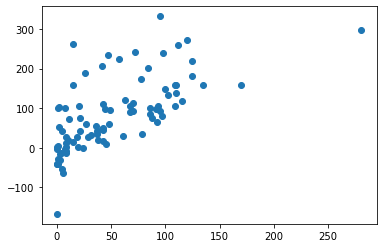

In [136]:
plt.scatter(data["covid_deaths_per_100k"],data["excess_deaths_per_100k"])

In [137]:
data[data.covid_deaths_per_100k >250]

,country,year,covid_deaths_per_100k,excess_deaths_per_100k,PR,CL,Status,HDI_2019
66,Peru,2020,280.505518,296.143971,3,3,PF,0.777


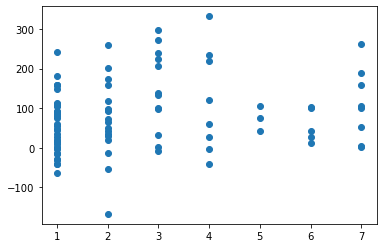

In [139]:
plt.scatter(data["PR"],data["excess_deaths_per_100k"])

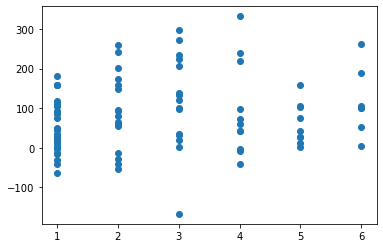

In [140]:
plt.scatter(data["CL"],data["excess_deaths_per_100k"])

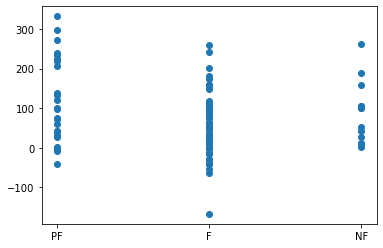

In [141]:
plt.scatter(data["Status"],data["excess_deaths_per_100k"])

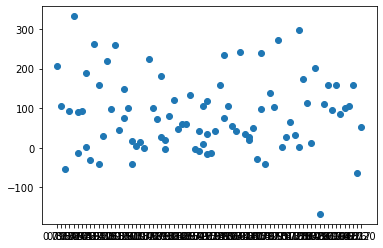

In [142]:
plt.scatter(data["HDI_2019"],data["excess_deaths_per_100k"])